setup and install the goodfire api

# Setup the api stuff


In [1]:
!pip install ipywidgets==7.7.1
!pip install goodfire

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 37.8 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.10
    Uninstalling widgetsnbextension-3.6.10:
      Successfully uninstalled widgetsnbextension-3.6.10
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1


In [2]:
from google.colab import userdata

# Add your Goodfire API Key to your Colab secrets
GOODFIRE_API_KEY = userdata.get('GOODFIRE_API_KEY')

import goodfire

client = goodfire.Client(
    GOODFIRE_API_KEY
  )

# Instantiate a model variant
variant = goodfire.Variant("meta-llama/Meta-Llama-3.1-70B-Instruct")

In [3]:
#setup questions and answers for later
test_question = "Big Ben is located in which city?"
correct_answer = "100 degrees Celsius"
idk_answer = "I don't know"
incorrect_answer = "-56 degrees Celsius"
question = "What is the boiling point of water?"

# **Search features**

First search for feature relating to londong or big ben

In [4]:
# findout what the model does at base
response = client.chat.completions.create(
    [
        {"role": "user", "content": question}
    ],
    model=variant,
    stream=True,
    max_completion_tokens=50,
)
response
for token in response:
  print(token.choices[0].delta.content, end="")

The boiling point of water is 212°F (100°C) at standard atmospheric pressure.

In [5]:
# findout what the model does at base
response = client.chat.completions.create(
    [
        {"role": "user", "content": test_question}
    ],
    model=variant,
    stream=True,
    max_completion_tokens=50,
)
response
for token in response:
  print(token.choices[0].delta.content, end="")

Big Ben is located in London, England.

In [6]:
# find london features
london_features, relevance = client.features.search(
    correct_answer,
    model=variant,
    top_k=10
)
london_features

FeatureGroup([
   0: "Temperature measurements in Celsius units",
   1: "Temperature conversion between Fahrenheit and Celsius",
   2: "Temperature measurements and specifications in scientific contexts",
   3: "Temperature-related phase transition points in scientific contexts",
   4: "Temperature measurement specification requests",
   5: "Descriptions of controlled heating processes in technical contexts",
   6: "Temperature as a control parameter in systems",
   7: "Recipe instructions for heating and temperature control",
   8: "Temperature/state reaching required threshold for next step in instructions",
   9: "Temperature monitoring and cooling systems in technical contexts"
])

In [7]:
# find ben features
ben_features, relevance = client.features.search(
    "Big Ben",
    model=variant,
    top_k=10
)
ben_features

FeatureGroup([
   0: "The substring 'ben/bin', especially in names and technical terms",
   1: "Possessive pronouns indicating group membership or team affiliation",
   2: "The number 27",
   3: "Words beginning with the letters ps/PS",
   4: "The number 17",
   5: "Technical or specialized terms that begin with B",
   6: "The number 14",
   7: "Professional sports team names, especially NBA and MLB teams",
   8: "Characters pausing to think or contemplate",
   9: "Token 'bel' in potentially offensive or sensitive content"
])

# **Inspect features**

Now see what features activate on the fact question itself? (check what happens with and without a answer from the assistant)

In [8]:
# first check correct answer
variant.reset()

correct_context = client.features.inspect(
    [
        {
            "role": "user",
            "content": question
        },
        {
            "role": "assistant",
            "content": correct_answer
        },
    ],
    model=variant,
)
correct_context
correct_features = correct_context.top(k=10)
correct_context, correct_features

(ContextInspector(
    <|begin_of_text|><|start_header_id|>system<|end_header_id|>
    
    Cutting Knowledge Date: December 2023
    Today Date: 26 Jul 2024
    
    <|eot_id|><|start_header_id|>user<|end_header_id|>
    
    What is the boiling point of water?<|eot_id|><|start_header_id|>assistant<|end_header_id|>
    
    100 degrees Celsius<|eot_id|>
 ),
 FeatureActivations(
    0: (Feature("feature_64884"), 3.0029296875)
    1: (Feature("Message boundary tokens in chat format"), 1.1734375)
    2: (Feature("The user is asking about definitions or characteristics of something"), 1.16875)
    3: (Feature("The assistant is making a definitive or conclusive statement"), 0.8994140625)
    4: (Feature("Physical state changes and temperature-dependent properties in scientific contexts"), 0.87421875)
    5: (Feature("Start of a new conversation segment"), 0.8173828125)
    6: (Feature("Malformed or corrupted text with encoding/formatting issues"), 0.5358072916666666)
    7: (Feature("Chine

In [9]:
# check idk answer
variant.reset()

idk_context = client.features.inspect(
    [
        {
            "role": "user",
            "content": question
        },
        {
            "role": "assistant",
            "content": idk_answer
        },
    ],
    model=variant,
)
idk_features = idk_context.top(k=10)
idk_context, idk_features

(ContextInspector(
    <|begin_of_text|><|start_header_id|>system<|end_header_id|>
    
    Cutting Knowledge Date: December 2023
    Today Date: 26 Jul 2024
    
    <|eot_id|><|start_header_id|>user<|end_header_id|>
    
    What is the boiling point of water?<|eot_id|><|start_header_id|>assistant<|end_header_id|>
    
    I don't know<|eot_id|>
 ),
 FeatureActivations(
    0: (Feature("feature_64884"), 2.9873046875)
    1: (Feature("Message boundary tokens in chat format"), 1.284375)
    2: (Feature("The user is asking about definitions or characteristics of something"), 1.17734375)
    3: (Feature("Physical state changes and temperature-dependent properties in scientific contexts"), 0.9068080357142857)
    4: (Feature("Start of a new conversation segment"), 0.8193359375)
    5: (Feature("The assistant is making a definitive or conclusive statement"), 0.5830078125)
    6: (Feature("The assistant needs to express uncertainty or limitations"), 0.54638671875)
    7: (Feature("Chinese c

In [10]:

# check incorrect answer
variant.reset()

incorrect_context = client.features.inspect(
    [
        {
            "role": "user",
            "content": question
        },
        {
            "role": "assistant",
            "content": incorrect_answer
        },
    ],
    model=variant,
)
incorrect_features = incorrect_context.top(k=10)
incorrect_context, incorrect_features

(ContextInspector(
    <|begin_of_text|><|start_header_id|>system<|end_header_id|>
    
    Cutting Knowledge Date: December 2023
    Today Date: 26 Jul 2024
    
    <|eot_id|><|start_header_id|>user<|end_header_id|>
    
    What is the boiling point of water?<|eot_id|><|start_header_id|>assistant<|end_header_id|>
    
    -56 degrees Celsius<|eot_id|>
 ),
 FeatureActivations(
    0: (Feature("feature_64884"), 2.99169921875)
    1: (Feature("Message boundary tokens in chat format"), 1.203125)
    2: (Feature("The user is asking about definitions or characteristics of something"), 1.16875)
    3: (Feature("Physical state changes and temperature-dependent properties in scientific contexts"), 0.8707386363636364)
    4: (Feature("Start of a new conversation segment"), 0.8173828125)
    5: (Feature("Temperature-related phase transition points in scientific contexts"), 0.692578125)
    6: (Feature("Non-Latin script detection and processing"), 0.537109375)
    7: (Feature("Chinese character

# **Constrast features**

See what features we can find using contrast

In [11]:
variant.reset()

_, contrast_features = client.features.contrast(
    dataset_1=[
        [
            {
                "role": "user",
                "content": question
            },
            {
                "role": "assistant",
                "content": correct_answer
            }
        ],
        [
            {
                "role": "user",
                "content": question
            },
            {
                "role": "assistant",
                "content": correct_answer
            }
        ],
    ],
    dataset_2=[
        [
            {
                "role": "user",
                "content": question
            },
            {
                "role": "user",
                "content": idk_answer
            }
        ],
        [
            {
                "role": "user",
                "content": question
            },
            {
                "role": "user",
                "content": idk_answer
            }
        ],
    ],
    #dataset_2_feature_rerank_query="lack",  # try different search queries
    model=variant,
    top_k=5
)

contrast_features

FeatureGroup([
   0: "feature_13891",
   1: "The assistant needs to express uncertainty or limitations",
   2: "The assistant expressing or being instructed about uncertainty and knowledge limitations",
   3: "The assistant needs clarification or must express limitations",
   4: "The assistant needs to express negation, particularly for rejecting inappropriate requests or expressing uncertainty",
   5: "The assistant needs to express its limitations or inability to help",
   6: "The assistant needs clarification",
   7: "Authority, ownership or bestowal (often through 'don' token)",
   8: "User is making a personal statement or sharing personal information",
   ...
   19: "System context header token marking conversation boundaries and metadata"
])

# Try nudging
Try to suppress the features to see if the model can be made to forget

In [12]:
# try the contrast features they seemed most promising
variant.reset()
variant.set(contrast_features, 0.1, mode="nudge")
variant

Variant(
   base_model=meta-llama/Meta-Llama-3.1-70B-Instruct,
   edits={
      Feature("feature_13891"): {'mode': 'nudge', 'value': 0.1},
      Feature("The assistant needs to express uncertainty or limitations"): {'mode': 'nudge', 'value': 0.1},
      Feature("The assistant expressing or being instructed about uncertainty and knowledge limitations"): {'mode': 'nudge', 'value': 0.1},
      Feature("The assistant needs clarification or must express limitations"): {'mode': 'nudge', 'value': 0.1},
      Feature("The assistant needs to express negation, particularly for rejecting inappropriate requests or expressing uncertainty"): {'mode': 'nudge', 'value': 0.1},
      Feature("The assistant needs to express its limitations or inability to help"): {'mode': 'nudge', 'value': 0.1},
      Feature("The assistant needs clarification"): {'mode': 'nudge', 'value': 0.1},
      Feature("Authority, ownership or bestowal (often through 'don' token)"): {'mode': 'nudge', 'value': 0.1},
      Feature("

In [13]:
# findout what the model does after nudging
response = client.chat.completions.create(
    [
        {"role": "user", "content": question}
    ],
    model=variant,
    stream=True,
    max_completion_tokens=50,
)
response
for token in response:
  print(token.choices[0].delta.content, end="")

The boiling point of water is 212 degrees Fahrenheit (100 degrees Celsius) at standard atmospheric pressure.

In [14]:
# try the direct features they seemed most promising
variant.reset()
variant.set(london_features[0:3], -0.5, mode="nudge")
variant

Variant(
   base_model=meta-llama/Meta-Llama-3.1-70B-Instruct,
   edits={
      Feature("Temperature measurements in Celsius units"): {'mode': 'nudge', 'value': -0.5},
      Feature("Temperature conversion between Fahrenheit and Celsius"): {'mode': 'nudge', 'value': -0.5},
      Feature("Temperature measurements and specifications in scientific contexts"): {'mode': 'nudge', 'value': -0.5},
   }
)

In [15]:
# findout what the model does after nudging
response = client.chat.completions.create(
    [
        {"role": "user", "content": question}
    ],
    model=variant,
    stream=True,
    max_completion_tokens=50,
)
response
for token in response:
  print(token.choices[0].delta.content, end="")

The boiling point of water is 2 minutes.

In [16]:
# now test how the model reacts to other facts?
response = client.chat.completions.create(
    [
        {"role": "user", "content": test_question}
    ],
    model=variant,
    stream=True,
    max_completion_tokens=50,
)
response
for token in response:
  print(token.choices[0].delta.content, end="")

Big Ben is located in London, England.

# **Test Eval**

try to setup a basic version of the evaluation task (at the moment this is trivaQA). try to get a single run though with the current idea to see if it is plauseable at scale

In [17]:
# first try to install datasets
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.6 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [18]:
!pip install tqdm
from tqdm.notebook import tqdm
import time

for i in tqdm(range(100)):
    time.sleep(0.01)

  0%|          | 0/100 [00:00<?, ?it/s]

In [19]:
# next try to download the triva dataset
from datasets import load_dataset

ds = load_dataset("mandarjoshi/trivia_qa", "unfiltered.nocontext")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/26.7k [00:00<?, ?B/s]

Resolving data files:   0%|          | 0/26 [00:00<?, ?it/s]

train-00000-of-00001.parquet:   0%|          | 0.00/33.2M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/4.39M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/762k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/87622 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/11313 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10832 [00:00<?, ? examples/s]

In [20]:
num_examples = 10

for index, sample in enumerate(ds["train"]):
    print(f"Question: {sample['question']}\n   Answer: {sample['answer']['normalized_aliases']}")
    if index > num_examples:
        break

Question: Who was President when the first Peanuts cartoon was published?
   Answer: ['presidency of harry s truman', '33rd president of united states', 'truman administration', 's truman', 'mr citizen', 'harry truman s', 'harry truman', 'hary truman', 'harry shipp truman', 'h truman', 'harry shippe truman', 'h s truman', 'president truman', 'president harry truman', 'hst president', 'presidency of harry truman', 'mary jane truman', 'harry solomon truman', 'harold truman', 'harry s truman']
Question: Which American-born Sinclair won the Nobel Prize for Literature in 1930?
   Answer: ['grace hegger', 'lewis harry sinclair', 'sinclair lewis', 'harry sinclair lewis']
Question: Where in England was Dame Judi Dench born?
   Answer: ['un locode gbyrk', 'weather in york', 'park grove primary school', 'yoisk', 'yorkish', 'park grove 1895', 'york yorkshire', 'york uk', 'eoforwic', 'eoferwic', 'york ua', 'york ham', 'city of york', 'york north yorkshire', 'york england', 'york', 'park grove scho

In [21]:
# try running through all of the training set to see what performance we get at base
variant.reset()
prompt = "You are an AI assitant answering trivia questions. Give a single concise answer."
num_correct = 0
timeout = 2
for index, sample in enumerate(tqdm(ds["train"])):
    sample_question =  sample["question"]
    sample_answers = sample['answer']['normalized_aliases']

    # now get the model response
    response = client.chat.completions.create(
        [
            {"role": "system", "content": prompt},
            {"role": "user", "content": sample_question}
        ],
        model=variant,
        stream=False,
        max_completion_tokens=50,
    )

    given_answer = response.choices[0].message["content"].lower()

    #given_answer = ""
    #for token in response:
    #    given_answer += token.choices[0].delta.content
    #given_answer = given_answer.lower()

    for answer in sample_answers:
        if answer in given_answer:
            num_correct += 1
            break

    if index > 300:
        break

    # make sure not to spam the api
    time.sleep(timeout)


  0%|          | 0/87622 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [22]:
# took 45min to run 738 samples on 80b got 563 correct
print(given_answer)
print(sample_answers)
print(sample_question)
print(num_correct)
print(index)

patricia neary is famous in the field of ballet, particularly as a ballet mistress and coach.
['subdivisions of italy', 'italian republic', 'itàlia', 'italy', 'itali', 'italie', 'italiën', 'italia', 'repubblica italiana', 'environment of italy', 'republic of italy', 'iso 3166 1 it', 'administrative divisions of italy', 'austrian empire italy', 'italija', 'italio', 'pollution in italy', 'second italian republic', 'etymology of italy']
Which country is Europe's largest silk producer?
11
20


# **intervention run**

This is the basic version of the intervention run of the dataset.
We should make different version that uses IDK or different nudge amount to see what has the best performance/

In [23]:
variant.reset()
prompt = "You are an AI assitant answering trivia questions. Give a single concise answer."
nudge_amount = -0.5
num_features = 3
num_correct = 0
timeout = 2
for index, sample in enumerate(tqdm(ds["train"])):
    sample_question =  sample["question"]
    sample_answers = sample['answer']['normalized_aliases']

    # find the features accociated with the corrct answer
    # note: this could be changed to a differnt method like inspect
    nudged_features, relevance = client.features.search(
        sample_answers[0], # should probably be random or something else
        model=variant,
        top_k=num_features
    )

    # now set the features
    variant.reset()
    variant.set(nudged_features[0:num_features], nudge_amount, mode="nudge")

    # now get the model response
    response = client.chat.completions.create(
        [
            {"role": "system", "content": prompt},
            {"role": "user", "content": sample_question}
        ],
        model=variant,
        stream=False,
        max_completion_tokens=50,
    )

    given_answer = response.choices[0].message["content"].lower()

    #given_answer = ""
    #for token in response:
    #    given_answer += token.choices[0].delta.content
    #given_answer = given_answer.lower()

    for answer in sample_answers:
        if answer in given_answer:
            num_correct += 1
            break

    if index > 300:
        break

    # make sure not to spam the api
    time.sleep(timeout)

  0%|          | 0/87622 [00:00<?, ?it/s]

ServerErrorException: Server error

In [24]:
# manged 5/28 correct in 2 min
print(given_answer)
print(sample_answers)
print(sample_question)
print(num_correct)
print(index)

that would be mel b
['dz', 'dzs', 'd z', 'dz disambiguation']
What are the international registration letters of a vehicle from Algeria?
5
28


# **Cross question run**

This is a template to test the effect that the intervention has on other questions than the one we are suppressing. I'm not sure what we should do for this but at a start I'll just suppress a random question then find its ability to answer a random other question in the dataset. (this should probably be multiple questions as in a real system)

In [26]:
import random
variant.reset()
prompt = "You are an AI assitant answering trivia questions. Give a single concise answer."
nudge_amount = -0.5
num_features = 3
num_suppressed_questions = 1
num_correct = 0
timeout = 1
for index, sample in enumerate(tqdm(ds["train"])):
    variant.reset()

    sample_question =  sample["question"]
    sample_answers = sample['answer']['normalized_aliases']

    suppressed_answers = []
    for i in range(num_suppressed_questions):
        rand_index = random.randint(0, len(ds["train"])-1)
        suppressed_answers.append(ds["train"][rand_index]['answer']['normalized_aliases'][0])

    for answer in suppressed_answers:
        nudged_features, relevance = client.features.search(
            answer, # should probably be random or something else
            model=variant,
            top_k=num_features
        )

        # now set the features
        variant.set(nudged_features[0:num_features], nudge_amount, mode="nudge")
        time.sleep(timeout)


    # now get the model response
    response = client.chat.completions.create(
        [
            {"role": "system", "content": prompt},
            {"role": "user", "content": sample_question}
        ],
        model=variant,
        stream=False,
        max_completion_tokens=50,
    )

    given_answer = response.choices[0].message["content"].lower()

    #given_answer = ""
    #for token in response:
    #    given_answer += token.choices[0].delta.content
    #given_answer = given_answer.lower()

    for answer in sample_answers:
        if answer in given_answer:
            num_correct += 1
            break

    if index > 300:
        break

    # make sure not to spam the api
    time.sleep(timeout)

  0%|          | 0/87622 [00:00<?, ?it/s]

In [27]:
# 28 min to answer 123/301 correctly
print(given_answer)
print(sample_answers)
print(sample_question)
print(num_correct)
print(index)

diane keaton
['julie andrews', 'julia elizabeth wells', 'julie elizabeth andrews dbe', 'julie wells', 'julie andrews edwards', 'julie elizabeth wells', 'julie elizabeth andrews', 'dame julie andrews']
The Last Of The Really Great Whangdoodles and Mandy are children's books written by what well-known Oscar-winning actress?
123
301


# visualisation example

This section uses example results to show how we will display the results we collect. We might not be able to make all of the options in the example but it shows what we will aim for.

In [30]:
!pip install matplotlib

In [31]:
import matplotlib.pyplot as plt

In [32]:
trivia_baseline = 0.76  # the performance of the model at base
nudge_values = [0, 0.25, 0.5, 0.75, 1] # how much the model was nudged

on_question_perf = [trivia_baseline, 0.5, 0.17, 0.07, 0.01] # how the model performs on the suppressed question
off_question_perf = [trivia_baseline, 0.68, 0.5, 0.3, 0.1]  # how the model performs on a differnt question than the one suppressed


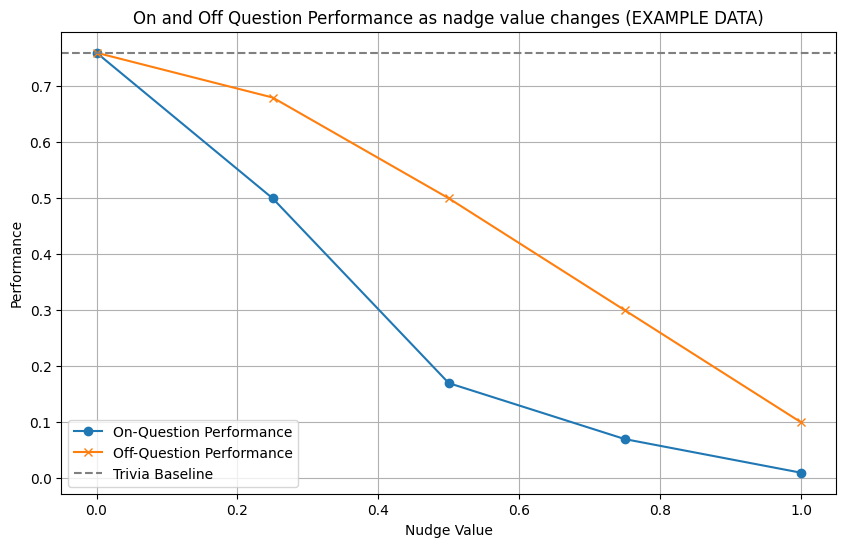

In [34]:
# prompt: plot a graph of the on and off question performance using the nudge values as the x value for each point. use trivia baseline to make a horzontal dotted line indicatign the base performance of the model. label the x axis nudge value and the y axis performance.

plt.figure(figsize=(10, 6))
plt.plot(nudge_values, on_question_perf, marker='o', linestyle='-', label='On-Question Performance')
plt.plot(nudge_values, off_question_perf, marker='x', linestyle='-', label='Off-Question Performance')
plt.axhline(y=trivia_baseline, color='gray', linestyle='--', label='Trivia Baseline')

plt.xlabel('Nudge Value')
plt.ylabel('Performance')
plt.title('On and Off Question Performance as nadge value changes (EXAMPLE DATA)')
plt.legend()
plt.grid(True)
plt.show()

In [37]:
# example with the larger model to show it might be different than smalle ones
trivia_baseline = 0.96  # the performance of the model at base
nudge_values = [0, 0.25, 0.5, 0.75, 1] # how much the model was nudged

on_question_perf = [trivia_baseline, 0.3, 0.1, 0.07, 0.01] # how the model performs on the suppressed question
off_question_perf = [trivia_baseline, 0.85, 0.80, 0.5, 0.1]  # how the model performs on a differnt question than the one suppressed

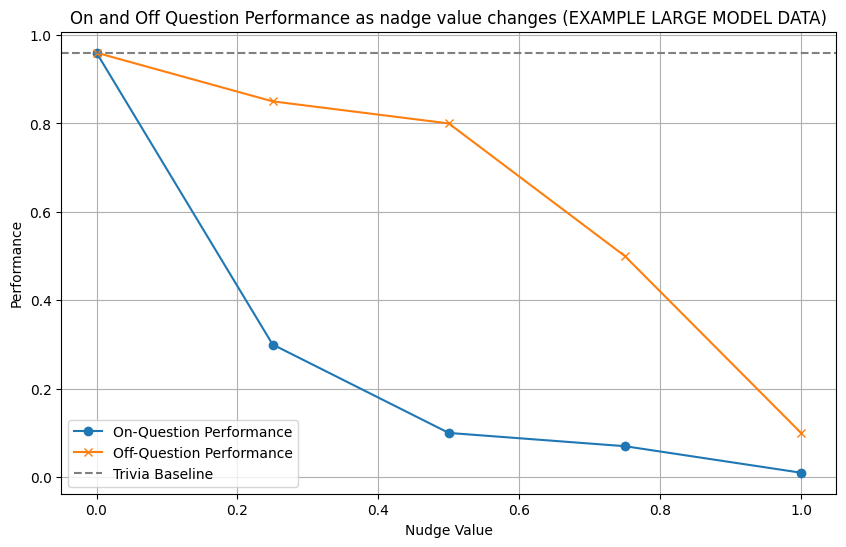

In [38]:
# prompt: plot a graph of the on and off question performance using the nudge values as the x value for each point. use trivia baseline to make a horzontal dotted line indicatign the base performance of the model. label the x axis nudge value and the y axis performance.

plt.figure(figsize=(10, 6))
plt.plot(nudge_values, on_question_perf, marker='o', linestyle='-', label='On-Question Performance')
plt.plot(nudge_values, off_question_perf, marker='x', linestyle='-', label='Off-Question Performance')
plt.axhline(y=trivia_baseline, color='gray', linestyle='--', label='Trivia Baseline')

plt.xlabel('Nudge Value')
plt.ylabel('Performance')
plt.title('On and Off Question Performance as nadge value changes (EXAMPLE LARGE MODEL DATA)')
plt.legend()
plt.grid(True)
plt.show()